## Practice 4. SARIMAX

공휴일인지 여부와 함께 주말인지 여부도 식당의 방문객 수에 영향을 줄 수 있습니다. 요일 정보를 이용해서 주말 여부를 인코딩하고, 이를 공휴일 여부와 함께 외생 변수로 사용하여 SARIMAX 모델을 만들어보세요.

In [1]:
from utils import load_restaurant 

In [2]:
train_df, test_df = load_restaurant()

In [3]:
train_df["weekend"] = train_df["weekday"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)
test_df["weekend"] = test_df["weekday"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)

In [13]:
train_df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,weekend
date,,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0,0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0,1
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0,1
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0,0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0,0
...,...,...,...,...,...,...,...,...,...
2016-11-26,Saturday,0,na,69.0,48.0,60.0,55.0,232.0,1
2016-11-27,Sunday,0,na,49.0,13.0,43.0,50.0,155.0,1
2016-11-28,Monday,0,na,20.0,17.0,14.0,20.0,71.0,0


In [10]:
from matplotlib import pyplot as plt
import pandas as pd

def plot_with_weekend(df):
    df["total"].plot(figsize=(10, 2))
    weekends = df[df["weekend"]==1].index.values
    for weekend in weekends:
        plt.axvline(x=weekend, color="red", linestyle="--")
    plt.xlim(df.iloc[0].name, df.iloc[30].name)

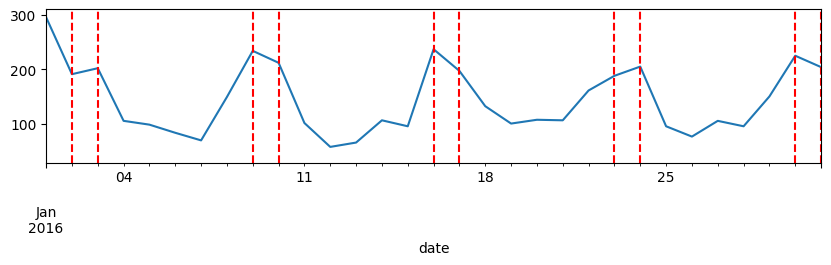

In [11]:
plot_with_weekend(train_df)

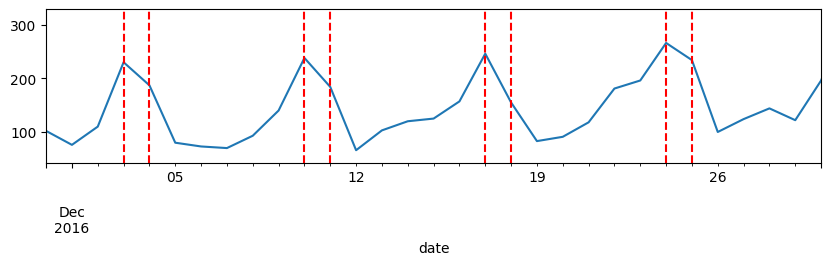

In [12]:
plot_with_weekend(test_df)